# TWİTTER ÜZERİNDEN VERİLERİN ÇEKİLMESİ

In [8]:
#!pip install -U textblob
#!pip install wordcloud
#!pip install snscrape
from textblob import TextBlob
from wordcloud import WordCloud

import snscrape.modules.twitter as sntwitter
import pandas as pd
import re

# tweetleri tutmak için bir dizi oluşturuyoruz.
tweet_listesi = []
keyword='izmirdepremi'

# TwitterSearchScraper kullanarak twitter dan verileri çekiyoruz.
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(keyword + ' since:2020-10-30 lang:tr').get_items()):
    if i>100: #burada ne kadar tweet çekeceğimizi belirtiyoruz.
        break
    tweet_listesi.append([tweet.content,tweet.date])


#tweetleri tuttuğumuzu diziyi dataframe e dönüştürüyoruz.
tweetler = pd.DataFrame(tweet_listesi, columns=['Tweetler','Tarih'])

#Verilerin çekmesi uzun sürdüğü için önceden çekilen tweetler sisteme yüklenecektir.

In [9]:
tweetler #örnek olarak çekilen tweetler

,Tweetler,Tarih
0,DEPREMZEDELERE HAMBURG’TAN YARDIM ELİ https://...,2021-01-20 07:17:46+00:00
1,@rat_yegin @Can_21_1 @AB14unkramponu @ProfDemi...,2021-01-19 20:29:56+00:00
2,@KullanTwitteer @ayazzyky 99 depreminin ne kad...,2021-01-19 18:03:21+00:00
3,@neksell ŞWÖİZÖWŞXMQŞF ya deprem enkazi sanmis...,2021-01-19 15:24:30+00:00
4,📌KAYNAK:AFAD\n\nDeprem öncesi aldığımız her ön...,2021-01-19 13:28:46+00:00
...,...,...
96,Güzelbahçe’ye erken uyarı sistemi https://t.co...,2021-01-07 06:10:00+00:00
97,Ayni tarihte ki diğer yorumum...\nDeprem konus...,2021-01-06 21:33:34+00:00
98,bu yıkım çalışmasında sokağımız gördüğünüz hal...,2021-01-06 18:02:57+00:00
99,#izmirdepremi sonrasında evi yıkılanlara yapıl...,2021-01-06 13:45:36+00:00


# VERİLER ÜZERİNDE ÖN İŞLEME

In [11]:
from __future__ import print_function
import os
import pandas as pd


data_path = ['data']
filepath = os.sep.join(data_path + ['türkçe.xlsx'])
data = pd.read_excel(filepath)

In [12]:
import re

def onisleme(text):
    text=re.sub(r'@[A-Za-z0-9]+', '',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'\n','',text)   
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\S+','',text)
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", text)
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        text = text.replace(p, ' ') 
    return text
data['Tweetler']=data['Tweetler'].apply(onisleme)
 
data['Tweetler']

0        Çiğli Belediye Başkanı Utku Gümrükçü 30 Aralık...
1                 Some vegetables stand out from the rest 
2        Prof  Dr  Hasan Sözbilir, İzmir de meydana gel...
3        ders kayıtlarını dinliyorum izmir depremi için...
4         Bir arkadaşım vardı izmir depremi ile ilgili ...
                               ...                        
19991    idil kurtuldu kardeşi ipek vefat etti, buse ku...
19992    Sen saçlarına baharları tak ÇOCUK Gülüşün güne...
19993    Enkaz altından her bir canımız kurtulmuş olara...
19994    izmirdepremi Görevlinin parmağını tuttuğu belk...
19995    Rıza bey apartmanında bulundu gecmisolsunizmir...
Name: Tweetler, Length: 19996, dtype: object

In [14]:
data

,Tweetler
0,Çiğli Belediye Başkanı Utku Gümrükçü 30 Aralık...
1,Some vegetables stand out from the rest
2,"Prof Dr Hasan Sözbilir, İzmir de meydana gel..."
3,ders kayıtlarını dinliyorum izmir depremi için...
4,Bir arkadaşım vardı izmir depremi ile ilgili ...
...,...
19991,"idil kurtuldu kardeşi ipek vefat etti, buse ku..."
19992,Sen saçlarına baharları tak ÇOCUK Gülüşün güne...
19993,Enkaz altından her bir canımız kurtulmuş olara...
19994,izmirdepremi Görevlinin parmağını tuttuğu belk...


# TÜRKÇE TWEET'LERİN İNGİLİZCE' YE ÇEVRİLMESİ

In [20]:
#Çeviri işleminde google translate kullanılmıştır. Çeviri işleminde modül belli bir sayıdan sonra tweetleri çeviremediğinden
#veri seti parça parça çevrilmiştir. Çeviri işleminin nasıl yapıldığı veri setinin ilk 100 veri üzerinde gösterilmiştir.

#!pip install google_trans_new 
from google_trans_new import google_translator  
translator = google_translator()

data1=data['Tweetler'].head(100)
ornek = pd.DataFrame(data1, columns=['Tweetler'])

ornek['Tweetler']=ornek['Tweetler'].astype('object')

ornek['Tweet']= ornek['Tweetler'].apply(translator.translate,lang_tgt='en')

ornek

,Tweetler,Tweet
0,Çiğli Belediye Başkanı Utku Gümrükçü 30 Aralık...,Çiğli Mayor Utku Gümrükçü visited our Branch o...
1,Some vegetables stand out from the rest,Some vegetables stand out from the rest
2,"Prof Dr Hasan Sözbilir, İzmir de meydana gel...",Prof. Dr. Hasan Sözbilir stated that the great...
3,ders kayıtlarını dinliyorum izmir depremi için...,I am listening to the lecture records. They wi...
4,Bir arkadaşım vardı izmir depremi ile ilgili ...,I had a friend and he was keeping up about the...
...,...,...
95,aa simdi fark ettim buyuk izmir depremi bundan...,Now I noticed that the big Izmir earthquake ha...
96,Uçaktan iner inmez ilk bildirmim izmir depremi...,"As soon as I got off the plane, my first notif..."
97,Son Dakika İzmir de şiddetli deprem izmir ...,Last Minute Izmir in severe earthquake izmir e...
98,"Aynı şey izmir depremi, Elazığ depremi ve bir ...","The same is true for Izmir earthquake, Elazig ..."


In [26]:
#İngilizceye çevrilmiş olan veri setini yüklüyoruz.
data_path = ['data']
filepath = os.sep.join(data_path + ['twitter.xlsx'])
twitter = pd.read_excel(filepath)
twitter

,Tweetler
0,Çiğli Mayor Utku Gümrükçü visited our Branch o...
1,Prof Dr Hasan Sözbilir stated that the big e...
2,I am listening to the lecture records
3,I had a friend and he was keeping up about the...
4,"5 01 2021, at 1722 o clock, about 8 km southwe..."
...,...
19889,"Idil survived his brother İpek passed away, Bu..."
19890,You put the springs on your hair CHILD Your sm...
19891,When every one of our lives is spared from the...
19892,izmirdepremi The moment when the officer grabs...


In [27]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

twitter['Subjectivity']=twitter['Tweetler'].apply(getSubjectivity)
twitter['Polarity']=twitter['Tweetler'].apply(getPolarity)

twitter

,Tweetler,Subjectivity,Polarity
0,Çiğli Mayor Utku Gümrükçü visited our Branch o...,0.000000,0.000000
1,Prof Dr Hasan Sözbilir stated that the big e...,0.309848,0.003788
2,I am listening to the lecture records,0.000000,0.000000
3,I had a friend and he was keeping up about the...,0.000000,0.000000
4,"5 01 2021, at 1722 o clock, about 8 km southwe...",0.400000,-0.250000
...,...,...,...
19889,"Idil survived his brother İpek passed away, Bu...",0.500000,0.500000
19890,You put the springs on your hair CHILD Your sm...,0.100000,0.300000
19891,When every one of our lives is spared from the...,0.000000,0.000000
19892,izmirdepremi The moment when the officer grabs...,0.000000,0.000000


In [28]:
def getAnaliz(score):
  if score<0:
    return '1'
  elif score==0:
    return '0'
  else:
    return '2'

twitter['Analiz']=twitter['Polarity'].apply(getAnaliz)
twitter

,Tweetler,Subjectivity,Polarity,Analiz
0,Çiğli Mayor Utku Gümrükçü visited our Branch o...,0.000000,0.000000,0
1,Prof Dr Hasan Sözbilir stated that the big e...,0.309848,0.003788,2
2,I am listening to the lecture records,0.000000,0.000000,0
3,I had a friend and he was keeping up about the...,0.000000,0.000000,0
4,"5 01 2021, at 1722 o clock, about 8 km southwe...",0.400000,-0.250000,1
...,...,...,...,...
19889,"Idil survived his brother İpek passed away, Bu...",0.500000,0.500000,2
19890,You put the springs on your hair CHILD Your sm...,0.100000,0.300000,2
19891,When every one of our lives is spared from the...,0.000000,0.000000,0
19892,izmirdepremi The moment when the officer grabs...,0.000000,0.000000,0


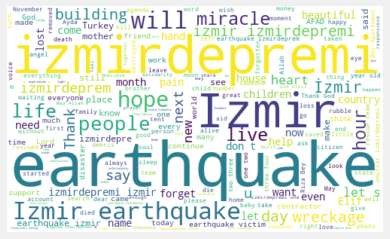

In [29]:
#Word Cloud Grafiği
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
kelimeler=' '.join([twts for twts in twitter['Tweetler']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119, background_color="white").generate(kelimeler)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

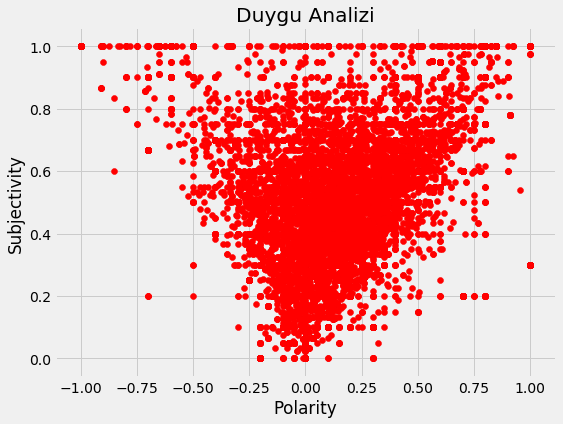

In [31]:
plt.figure(figsize=(8,6))
for i in range(0,twitter.shape[0]):
  plt.scatter(twitter['Polarity'][i],twitter['Subjectivity'][i], color='Red')
plt.title('Duygu Analizi')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

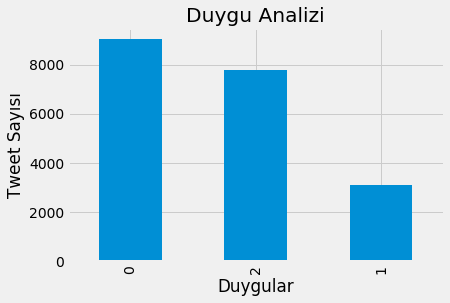

In [32]:
twitter['Analiz'].value_counts()
plt.title("Duygu Analizi")
plt.xlabel('Duygular')
plt.ylabel('Tweet Sayısı')
twitter['Analiz'].value_counts().plot(kind='bar')
plt.show()

# MODEL EĞİTİMİ VE SONUÇLARIN KARŞILAŞTIRILMASI

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

stopset = set(stopwords.words('english'))
vectorizer=TfidfVectorizer(use_idf=True, lowercase=True,strip_accents='ascii',stop_words=stopset)
y=twitter.Analiz
X=vectorizer.fit_transform(twitter.Tweetler)
print (y.shape)
print (X.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(19894,)
(19894, 16609)


In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

#Naive Bayes algoritması ile twitter yorumlarının tahmin edilmesi
nb=naive_bayes.MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))
test_roc_auc=roc_auc_score(y_test, nb.predict_proba(X_test),multi_class='ovr')
train_roc_auc=roc_auc_score(y_train, nb.predict_proba(X_train),multi_class='ovr')

print("Eğitim Doğruluğu :", test_roc_auc)
print("Test Doğruluğu :", train_roc_auc)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      2728
           1       1.00      0.07      0.13       949
           2       0.66      0.88      0.75      2292

    accuracy                           0.73      5969
   macro avg       0.82      0.59      0.56      5969
weighted avg       0.77      0.73      0.68      5969

Eğitim Doğruluğu : 0.8803209979870127
Test Doğruluğu : 0.9489242179653005


Eğitim Doğruluğu : 0.9995691202872531
Test Doğruluğu : 0.8470430557882392
F1 score : 0.7904986624705126
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2728
           1       0.89      0.48      0.62       949
           2       0.87      0.84      0.86      2292

    accuracy                           0.85      5969
   macro avg       0.86      0.77      0.79      5969
weighted avg       0.85      0.85      0.84      5969



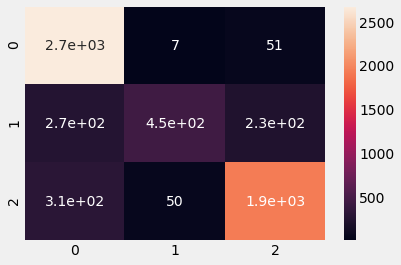

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
import seaborn as sns
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Eğitim Doğruluğu :", model.score(X_train, y_train))
print("Test Doğruluğu :", model.score(X_test, y_test))

# Test veri seti için f1 puanının hesaplanması
print("F1 score :", f1_score(y_test, y_pred,average='macro'))
print(classification_report(y_test, y_pred))

# karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Eğitim Doğruluğu : 0.9150448833034112
Test Doğruluğu : 0.8354833305411292
f1 score : 0.7800646214757513
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2728
           1       0.88      0.47      0.61       949
           2       0.88      0.83      0.85      2292

    accuracy                           0.84      5969
   macro avg       0.85      0.75      0.78      5969
weighted avg       0.84      0.84      0.83      5969



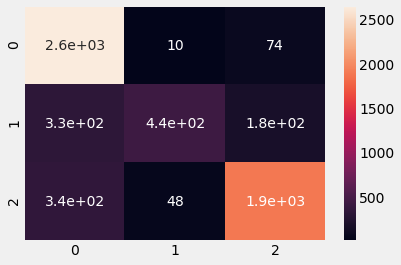

In [42]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Eğitim Doğruluğu :", model.score(X_train, y_train))
print("Test Doğruluğu :", model.score(X_test, y_test))

#  Test veri seti için f1 puanının hesaplanması
print("f1 score :", f1_score(y_test, y_pred,average='macro'))
print(classification_report(y_test, y_pred))

# karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

Eğitim Doğruluğu : 0.9995691202872531
Test Doğruluğu : 0.8247612665438097
f1 score : 0.7783745026452102
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2728
           1       0.67      0.57      0.62       949
           2       0.85      0.83      0.84      2292

    accuracy                           0.82      5969
   macro avg       0.79      0.77      0.78      5969
weighted avg       0.82      0.82      0.82      5969



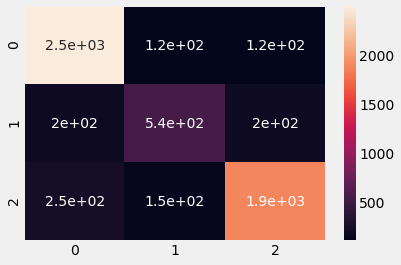

In [43]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Eğitim Doğruluğu :", model.score(X_train, y_train))
print("Test Doğruluğu :", model.score(X_test, y_test))

#  Test veri seti için f1 puanının hesaplanması
print("f1 score :", f1_score(y_test, y_pred,average='macro'))
print(classification_report(y_test, y_pred))

# karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)
